<font color = 'black' font size="+5" >User Interface</font>

<font color = 'black' font size="+2" >Read Data</font>
 

<font color = 'black' font size="+1" >The code below generates the matrix containning all the actions in each sequence</font>

<font color = 'black' font size="+1" >There are four different sets of data coming from four topics: confidential, dataleak, embezzlement and passwords, the variable 'data' is an overall data set</font>

In [1]:
import os       
import inspect
import operator
from nltk import cluster
from nltk.cluster import cosine_distance
from numpy import array
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from heapq import heappush, heappop, nlargest
import numpy
from operator import add
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from copy import copy,deepcopy
from sklearn.metrics import log_loss
import scipy as sp
import scipy.stats
from math import exp
from math import log
import scipy.sparse as sps
from sklearn.preprocessing import normalize
import time
from scipy import spatial
from random import shuffle
from scipy.sparse import coo_matrix
import random
import matplotlib.patches as mpatches

In [2]:
confidential=[]
dataleak=[]
embezzlement=[]
passwords=[]
all_log_dirs = []
all_log_dirs.append("C:\\Users\\shicong\\Downloads\\second\\logs\\data\\") 
confidential.append("C:\\Users\\shicong\\Downloads\\second\\logs\\confidential\\")   
dataleak.append("C:\\Users\\shicong\\Downloads\\second\\logs\\dataleak\\")   
embezzlement.append("C:\\Users\\shicong\\Downloads\\second\\logs\\embezzlement\\")   
passwords.append("C:\\Users\\shicong\\Downloads\\second\\logs\\passwords\\")   

def checkindex(local1,local2):
    if local1==local2:
        return 1
    else:
        return 0

def readdata(mylist,index):
    confidential=1
    dataleak=2
    embezzlement=3
    passwords=4
    data=5
    temp=''
    if checkindex(confidential,index)==1:
        temp='confidential'
    if checkindex(dataleak,index)==1:
        temp='dataleak'
    if checkindex(embezzlement,index)==1:
        temp='embezzlement'
    if checkindex(passwords,index)==1:
        temp='passwords'
    if checkindex(data,index)==1:
        temp='data'
        
    wordlist=[]
    highmatrix=[]
    logDir = mylist[0]
    logFiles = next(os.walk(logDir))[2]
    #logFiles is the a list containing all the files' names
    os.chdir("C:\\Users\\shicong\\Downloads\\second\\logs\\%s\\" %temp)
   
    for i in range(len(logFiles)):
        with open(logFiles[i], "r") as f:
            try:
                data = f.readlines()
            except UnicodeDecodeError:
                pass
            for line in data:
                word=line.split()
                if len(word)>3:
                    if "RCL"in word[3]:
                        #state2
                        wordlist.append(word[3]+word[4]+word[5])
                    if "Non-object" in word[3]:
                        #state1
                        wordlist.append(word[3]+word[4])
                    if "Table" in word[3]:
                        #state2
                        wordlist.append(word[3]+word[4])
                    if "mouse" in word[3]:
                        #state1
                        wordlist.append(word[3]+word[4])
                    if "Column" in word[3]:
                        #state2
                        wordlist.append(word[3]+word[4]+word[5])
                    if "Button" in word[3]:
                        #state4
                        wordlist.append(word[3]+word[4]+word[5])
                    if "Minimap" in word[3]:
                        #state5
                        if "box" in word[6]:
                            wordlist.append(word[3]+word[4]+word[5]+word[6]+word[7])
                        else:
                            wordlist.append(word[3]+word[4]+word[5]+word[6])
            highmatrix.append(wordlist)
            wordlist=[]
    return highmatrix

confidential1=readdata(confidential,1)
dataleak1=readdata(dataleak,2)
embezzlement1=readdata(embezzlement,3)
passwords1=readdata(passwords,4)
#sequences for the four tasks
all_log_dirs1 = readdata(all_log_dirs,5)
#sequences for all the tasks together

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [3]:
def transferaction(mylist)  : 
    #highmatrix2 is a matrix containning all the actions in each sequence
    highmatrix2=[]
    temp=[]
    for i in range(len(mylist)):
        for j in range (len(mylist[i])):
            if "Non-object" in mylist[i][j]:
                temp.append(0)
            if  "mouse" in mylist[i][j]:
                temp.append(1)
#             if  "mousedrag" in mylist[i][j]:
#                 temp.append(3)
    #    if "Buttonpushed:u" in highmatrix[i][j]:
     #       temp.append([1,4,4])
   #     if "Buttonpushed:e" in highmatrix[i][j]:
    #        temp.append([1,5,5])   
            if "Buttonpushed" in mylist[i][j]:
                temp.append(2)  
            if "RCLScroll" in mylist[i][j]:
                temp.append(3)
#             if "RCLScroll(click)" in mylist[i][j]:
#                 temp.append(6)  
#             if "RCLScroll(drag)" in mylist[i][j]:
#                 temp.append(7) 
            if "Table" in mylist[i][j]:
                temp.append(4) 
       # if "Columnclicked:From" in highmatrix[i][j]:
       #     temp.append([2,6,10]) 
       # if "Columnclicked:ID " in highmatrix[i][j]:
       #     temp.append([2,5,11]) 
        #if "Columnclicked:To " in highmatrix[i][j]:
       #     temp.append([2,7,12])
       # if "Columnclicked:Date" in highmatrix[i][j]:
       #     temp.append([2,8,11]) 
       # if "Columnclicked:Subject" in highmatrix[i][j]:
        #    temp.append([2,9,12])
        #if "Columnclicked:Tag" in highmatrix[i][j]:
      #      temp.append([2,10,13]) 
            if "Columnclicked" in mylist[i][j]:
                temp.append(5) 
            if "Buttonclick:Global" in mylist[i][j]:
                temp.append(6)
            if "Buttonclick:Normal" in mylist[i][j]:
                temp.append(7)
            if "Buttonclick:Malicious" in mylist[i][j]:
                temp.append(8)
            if "Buttonclick:Suspect" in mylist[i][j]:
                temp.append(9)
            if "Minimap" in mylist[i][j]:
                if "Minimapclickonbox" not in mylist[i][j]:
                    temp.append(10)
                else:
                    temp.append(11)
        highmatrix2.append(temp)
        temp=[]
    return highmatrix2
actionconfidential=transferaction(confidential1)   
actiondataleak=transferaction(dataleak1)
actionembezzlement=transferaction(embezzlement1)
actionpasswords=transferaction(passwords1)
actionall_log_dirs =transferaction(all_log_dirs1)


In [4]:
def merge_sequence(mylist): #This function merges all the consecutive mousexxx and RCL actions
    output=[]
    temp=[]
    last=-1
    for j in mylist:
        for i in j:
            if i==last and i==1: #mousexxx  actions
                last=i
                continue
            if i==last and i==3: #RCL actions
                last=i
                continue
            last=i
            temp.append(i)
        output.append(temp)
        temp=[]
    return output
actionconfidential= merge_sequence(actionconfidential)  
actiondataleak= merge_sequence(actiondataleak) 
actionembezzlement= merge_sequence(actionembezzlement) 
actionpasswords= merge_sequence(actionpasswords)
actionall_log_dirs=merge_sequence(actionall_log_dirs)

#These are the sequences which have been merged

In [5]:
def transferindex(mylist)  : 
    #highmatrix2 is a matrix containning all the actions in each sequence
    highmatrix2=[]
    temp=[]
    for i in range(len(mylist)):
        for j in range (len(mylist[i])):
            if 0==mylist[i][j] or 1==mylist[i][j] or 2==mylist[i][j]:
                temp.append(1)
            if 3==mylist[i][j] or 4==mylist[i][j] or 5==mylist[i][j]:
                temp.append(2)
            if 6==mylist[i][j] or 7==mylist[i][j] or 8==mylist[i][j] or 9==mylist[i][j]:
                temp.append(4)
            if 10==mylist[i][j] or 11==mylist[i][j]:
                temp.append(5)
        highmatrix2.append(temp)
        temp=[]
    return highmatrix2
confidential2=transferindex(actionconfidential)   
dataleak2=transferindex(actiondataleak)
embezzlement2=transferindex(actionembezzlement)
passwords2=transferindex(actionpasswords)
all_log_dirs2 =transferindex(actionall_log_dirs)
#transfer to states index

In [6]:
def plot_pairwise_heatmap(mylist,action_num,task_name):#plot the heatmap for any task
    refinetransit=np.zeros( (action_num,action_num) )
   
    np.set_printoptions(suppress=True)
    for row in actionpasswords:
        temp=[]
    
        for row2 in row:
            if temp==[]:
                temp.append(row2)
            else:
                refinetransit[temp[-1]-1][row2-1]=refinetransit[temp[-1]-1][row2-1]+1
                temp.append(row2)
    row_sums = refinetransit.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = refinetransit / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.title(task_name)
    plt.colorbar()
    plt.show()

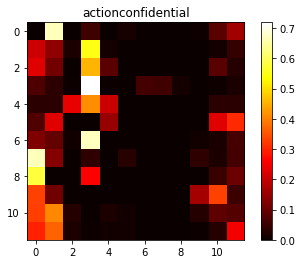

In [7]:
plot_pairwise_heatmap(actionconfidential,12,retrieve_name(actionconfidential)[0])

In [8]:
def printgraph(myset):
    
    c_row=-1
    l_row=-1
    c_col=-1
    l_col=-1
    a=0
    for j in myset:
        for i in j:   
            l_col=c_col
            l_row=c_row
            if i==1:
                c_row=random.randint(1,10)
      
                c_col=random.randint(1,10)
            if i==2:
                c_row=random.randint(10,20)
                c_col=random.randint(6,10)
            if i==4:
                c_row=random.randint(10,14)
                c_col=random.randint(1,4)
            if i==5:
                c_row=random.randint(14,20)
                c_col=random.randint(1,4)
            if l_col==-1:
                continue
    
            x = [l_row,c_row]
            y = [l_col,c_col]
            if i==1:
                plt.plot(x,y,c='b',linewidth = 1)
            if i==2:
                plt.plot(x,y,c='y',linewidth = 1)
            if i==4:
                plt.plot(x,y,c='g',linewidth = 1)
            if i==5:
                plt.plot(x,y,c='c',linewidth = 1)
        c_row=-1
        l_row=-1
        c_col=-1
        l_col=-1
        a+=1
        print('Processing',a)

    plt.plot([10,20],[4,4],c='r',linewidth = 2)
    plt.plot([10,10],[0,10],c='r',linewidth = 2)
    plt.plot([10,10],[0,10],c='r',linewidth = 2)
    plt.plot([13,13],[0,4],c='r',linewidth = 2)
    plt.plot([10,20],[6,6],c='r',linewidth = 2)
    axes = plt.gca()
    axes.set_xlim([0,20])
    axes.set_ylim([0,10])
        
    plt.show() 
#printgraph(confidential2)

Processing 0


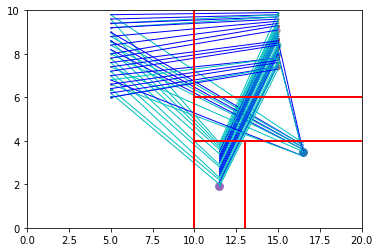

Processing 1


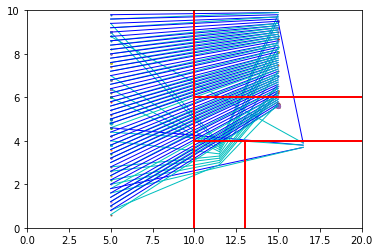

Processing 2


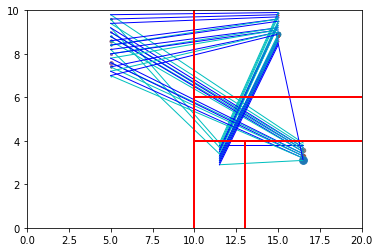

Processing 3


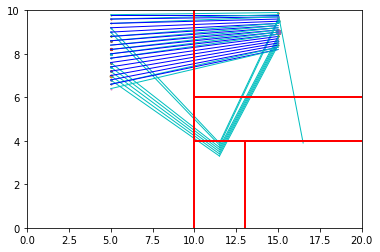

Processing 4


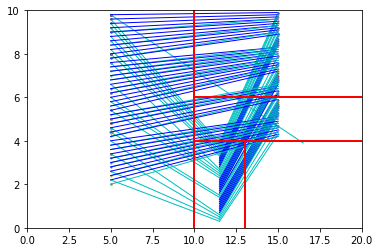

Processing 5


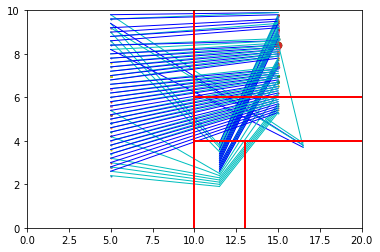

Processing 6


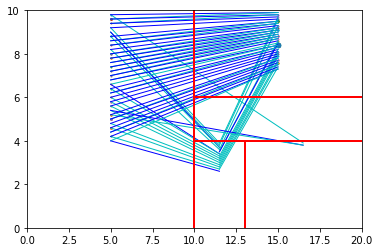

Processing 7


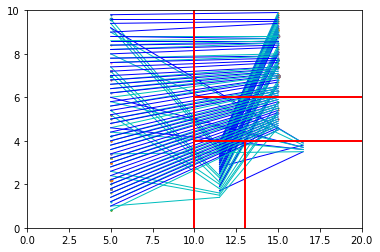

Processing 8


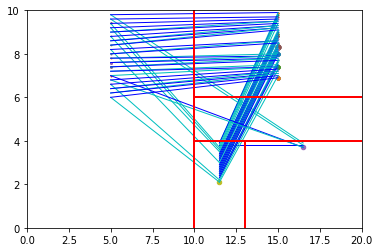

Processing 9


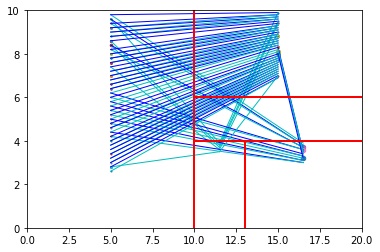

Processing 10


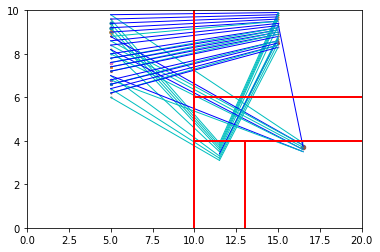

In [9]:
def plotonegraph(myset,index):
    #The size of the dot represent how long the user stays in the same state. Blue means from left to right and cyan means 
    #means from right to left
    state1=0
    state2=0
    state4=0
    state5=0
    c_row=-1
    l_row=-1
    c_col=-1
    l_col=-1
    s1=1
    s2=1
    s4=10
    s5=10
    a=0
    for i in myset[index]:   
        l_col=c_col
        l_row=c_row
        if i==1:
             
                
            if l_row==5:
                if s1<100:
                       s1+=1
                s = [s1]
                plt.scatter([5],[10-0.2*state1],s=s)
                continue
            s1=0
            state1+=1
            c_row=5
      
            c_col=10-0.2*state1
        if i==2:
            if l_row==15:
                if s2<100:
                    s2+=1
                s = [s2]
                plt.scatter([15],[10-0.1*state2],s=s)
                continue
            s2=0
            state2+=1
            c_row=15
            c_col=10-0.1*state2
        if i==4:
            if l_row==11.5:
                if s4<100:
                    s4+=20
                s=[s4]
                plt.scatter([11.5], [4-0.1*state4], s=s)
                continue
            s4=0
            state4+=1
            c_row=11.5
            c_col=4-0.1*state4
        if i==5:
            if l_row==16.5:
                if s5<100:
                    s5+=20
                s=[s5]
                plt.scatter([16.5], [4-0.1*state5], s=s)
                continue
            s5=0
            state5+=1
            c_row=16.5
            c_col=4-0.1*state5
        if l_col==-1:
            continue
    
        x = [l_row,c_row]
        y = [l_col,c_col]
        if l_row==5 and c_row==15:
            plt.plot(x,y,c='b',linewidth = 1)
        if l_row==5 and c_row==16.5:
            plt.plot(x,y,c='b',linewidth = 1)
        if l_row==5 and c_row==11.5:
            plt.plot(x,y,c='b',linewidth = 1)
        if l_row==11.5 and c_row==15:
            plt.plot(x,y,c='b',linewidth = 1)
        if l_row==11.5 and c_row==16.5:
            plt.plot(x,y,c='b',linewidth = 1)
        if l_row==15 and c_row==16.5:
            plt.plot(x,y,c='b',linewidth = 1)
        if l_row==15 and c_row==5:
            plt.plot(x,y,c='c',linewidth = 1)
        if l_row==16.5 and c_row==5:
            plt.plot(x,y,c='c',linewidth = 1)
        if l_row==11.5 and c_row==5:
            plt.plot(x,y,c='c',linewidth = 1)
        if l_row==15 and c_row==11.5:
            plt.plot(x,y,c='c',linewidth = 1)
        if l_row==16.5 and c_row==11.5:
            plt.plot(x,y,c='c',linewidth = 1)
        if l_row==16.5 and c_row==15:
            plt.plot(x,y,c='c',linewidth = 1)
    c_row=-1
    l_row=-1
    c_col=-1
    l_col=-1
    a+=1
    print('Processing',index)
   
    plt.plot([10,20],[4,4],c='r',linewidth = 2)
    plt.plot([10,10],[0,10],c='r',linewidth = 2)
    plt.plot([10,10],[0,10],c='r',linewidth = 2)
    plt.plot([13,13],[0,4],c='r',linewidth = 2)
    plt.plot([10,20],[6,6],c='r',linewidth = 2)
    axes = plt.gca()
    axes.set_xlim([0,20])
    axes.set_ylim([0,10])
        
    plt.show() 
def printgraph6(myset,indexlist):
    for i in range(len(indexlist)):
        plotonegraph(myset,indexlist[i])
printgraph6(confidential2,[0,1,2,3,4,5,6,7,8,9,10])   

        
    

    
    

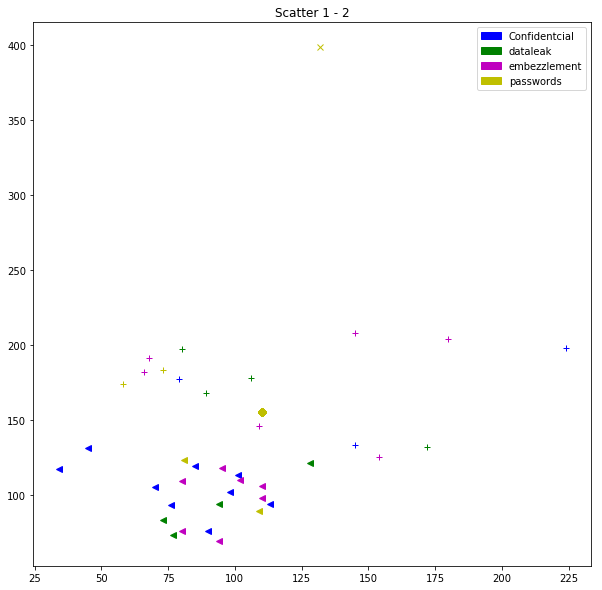

In [10]:
def create_kmeandata(mylist):
    final=[]
    for i in mylist:
        temp=[0,0,0,0]
        for j in i:
            if j==1:
                temp[0]+=1
            if j==2:
                temp[1]+=1
            if j==4:
                temp[2]+=1
            if j==5:
                temp[3]+=1
        final.append(temp)
    return final

label=[]
for i in range(19):
    label.append(0)
for i in range(19):
    label.append(1)
for i in range(19):
    label.append(2)
for i in range(19):
    label.append(3)
Attribute=[]
confi=create_kmeandata(confidential2)
datal=create_kmeandata(dataleak2)
embez=create_kmeandata(embezzlement2)
passw=create_kmeandata(passwords2)
for i in confi:
    Attribute.append(i)
for i in datal:
    Attribute.append(i)
for i in embez:
    Attribute.append(i)
for i in passw:
    Attribute.append(i)

def four_tast_graph(Attribute,label,first_num,sec_num):
    set1=[]
    set2=[]
    set3=[]
    set4=[]
    s1=[]
    s2=[]
    s3=[]
    s4=[]
    a = array(Attribute)
    b = array(label)
    y_pred = KMeans(n_clusters=4).fit_predict(a,y=b)
    y_predict=y_pred.tolist()

    for i in range(len(y_predict)):
        if y_predict[i]==0:
            set1.append(i)
        if y_predict[i]==1:
            set2.append(i)
        if y_predict[i]==2:
            set3.append(i)
        if y_predict[i]==3:
            set4.append(i)
    X=array(Attribute)
    #confidential, blue
    #dataleak, green
    #embezzlement, magenta
    #passwords,yellow

    co=array([0,1])
    plt.figure(1,figsize=(10,10))
    # plt.subplot(321)
    for i in set1:
        if i<=18:
            plt.plot(a[i, first_num], a[i, sec_num],  c='b',marker='+')
        if i>18 and i<=37:
            plt.plot(a[i, first_num], a[i, sec_num],  c='green',marker='+')
        if i>37 and i<=56:
            plt.plot(a[i, first_num], a[i, sec_num],  c='m',marker='+')
        if i>56 and i<78:
            plt.plot(a[i, first_num], a[i, sec_num],  c='y',marker='+')
    for j in set2:
        if i<=18:
            plt.plot(a[i, first_num], a[i, sec_num],  c='b',marker='D')
        if i>18 and i<=37:
            plt.plot(a[i, first_num], a[i, sec_num], c='green',marker='D')
        if i>37 and i<=56:
            plt.plot(a[i, first_num], a[i, sec_num],  c='m',marker='D')
        if i>56 and i<78:
            plt.plot(a[i, first_num], a[i, sec_num],  c='y',marker='D')
    for i in set3:
        if i<=18:
            plt.plot(a[i, first_num], a[i, sec_num], c='b',marker='x')
        if i>18 and i<=37:
            plt.plot(a[i, first_num], a[i, sec_num],  c='green',marker='x')
        if i>37 and i<=56:
            plt.plot(a[i, first_num], a[i, sec_num],  c='m',marker='x')
        if i>56 and i<78:
            plt.plot(a[i, first_num], a[i, sec_num],  c='y',marker='x')
    for i in set4:
        if i<=18:
            plt.plot(a[i, first_num], a[i, sec_num],  c='b',marker='<')
        if i>18 and i<=37:
            plt.plot(a[i, first_num], a[i, sec_num],  c='green',marker='<')
        if i>37 and i<=56:
            plt.plot(a[i, first_num], a[i, sec_num], c='m',marker='<')
        if i>56 and i<78:
            plt.plot(a[i, first_num], a[i, sec_num], c='y',marker='<')
    
    


    blue_patch = mpatches.Patch(color='b', label='Confidentcial')

    green_patch = mpatches.Patch(color='g', label='dataleak')

    magenta_patch = mpatches.Patch(color='m', label='embezzlement')



    yellow_patch = mpatches.Patch(color='y', label='passwords')
    plt.legend(handles=[blue_patch,green_patch,magenta_patch,yellow_patch])
    plt.title('Scatter %s - %s'%(first_num+1,sec_num+1))
    plt.figure(2,figsize=(10,10))
four_tast_graph(Attribute,label,0,1)

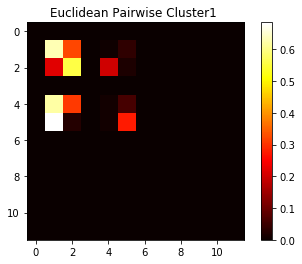

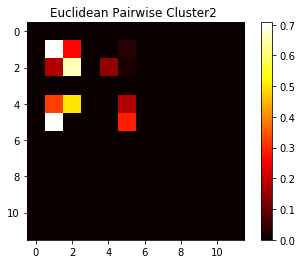

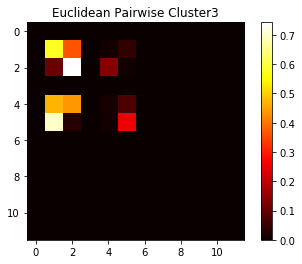

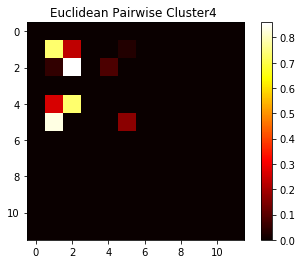

In [11]:
def create_transit(myset,action_num):
    np.set_printoptions(suppress=True)
    temp=-1
    coartransit=np.zeros( (action_num,action_num) )
    
    for row in myset:
        if temp==-1:
            temp=row

        if temp!=-1:
          
            coartransit[temp][row]+=1
            temp=row
    return coartransit
def create_four_euclidean_cluster(myset,action_num):
    Pairwise=[]
    temp2=[]
    for i in myset:
        temp=create_transit(i,action_num)
        for i in range(action_num):
            for j in range(action_num):
                temp2.append(temp[i][j])
        Pairwise.append(temp2)
        temp=[]
        temp2=[]


    Pairwise=np.asarray(Pairwise)


    kmeans = KMeans(n_clusters=4, tol=64,random_state=1).fit(Pairwise)


    after=kmeans.cluster_centers_

    np.set_printoptions(suppress=True)
    cluster1=np.zeros( (action_num,action_num) )
    cluster2=np.zeros( (action_num,action_num) )
    cluster3=np.zeros( (action_num,action_num) )
    cluster4=np.zeros( (action_num,action_num) )

    for i in range(action_num):
        for j in range(action_num):
            cluster1[i][j]+=after[0][i*action_num+j]
            cluster2[i][j]+=after[1][i*action_num+j]
            cluster3[i][j]+=after[2][i*action_num+j]
            cluster4[i][j]+=after[3][i*action_num+j]

    row_sums = cluster1.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster1 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Euclidean Pairwise Cluster1 ')
    plt.show()      
    row_sums = cluster2.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster2 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Euclidean Pairwise Cluster2 ')
    plt.show()      
    row_sums = cluster3.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster3 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Euclidean Pairwise Cluster3')
    plt.show()      
    row_sums = cluster4.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster4 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.title('Euclidean Pairwise Cluster4 ')
    plt.colorbar()
    plt.show() 
create_four_euclidean_cluster(all_log_dirs2,12)
      

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration


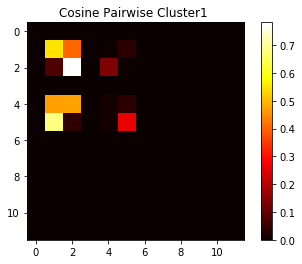

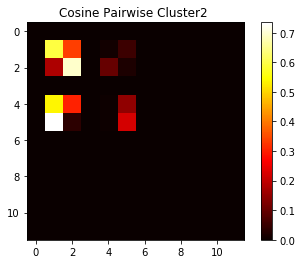

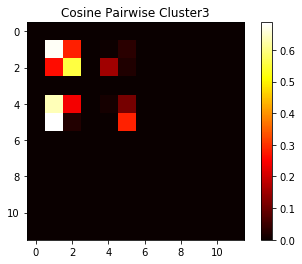

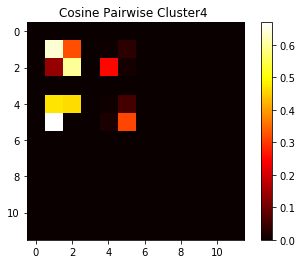

In [12]:
def create_four_euclidean_cluster(myset,action_num):
    Pairwise=[]
    temp2=[]
    for i in myset:
        temp=create_transit(i,action_num)
        for i in range(action_num):
            for j in range(action_num):
                temp2.append(temp[i][j])
        Pairwise.append(temp2)
        temp=[]
        temp2=[]
    Pairwise=np.asarray(Pairwise)



   
    clusterer = cluster.KMeansClusterer(4, cosine_distance) 
    clusters = clusterer.cluster(Pairwise, True, trace=True) 

    np.set_printoptions(suppress=True)
    after=clusterer.means()

    cluster1=np.zeros( (action_num,action_num) )
    cluster2=np.zeros( (action_num,action_num) )
    cluster3=np.zeros( (action_num,action_num) )
    cluster4=np.zeros( (action_num,action_num) )

    for i in range(action_num):
        for j in range(action_num):
            cluster1[i][j]+=after[0][i*action_num+j]
            cluster2[i][j]+=after[1][i*action_num+j]
            cluster3[i][j]+=after[2][i*action_num+j]
            cluster4[i][j]+=after[3][i*action_num+j]

    row_sums = cluster1.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster1 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Cosine Pairwise Cluster1 ')
    plt.show()      
    row_sums = cluster2.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster2 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Cosine Pairwise Cluster2 ')
    plt.show()      
    row_sums = cluster3.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster3 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Cosine Pairwise Cluster3')
    plt.show()      
    row_sums = cluster4.sum(axis=1)
    row_sums[row_sums == 0] = 1
    refinetransit1 = cluster4 / row_sums[:, np.newaxis]  

    plt.imshow(refinetransit1, cmap='hot', interpolation='nearest')
    plt.title('Cosine Pairwise Cluster4 ')
    plt.colorbar()
    plt.show() 
create_four_euclidean_cluster(all_log_dirs2,12)